# Top2Vec Analysis

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from top2vec import Top2Vec
import re

## Loading Comments Data

In [47]:
DATA_PATH = "C:/Users/doosti/Dropbox (Chapman)/Research/Research Projects/Fitness/Data/"
processed_file="processed_comments_102423.txt"
comments_file="merged_comments.csv"
comment_length=10
with open(os.path.join(DATA_PATH,processed_file),"r", encoding="utf-8") as f:
    processed_docs = f.readlines()
length = [len(re.sub("\d+", "", x.strip()).split(',')) for x in processed_docs]
comments = pd.read_csv(os.path.join(DATA_PATH, "merged_comments.csv"))
comments = comments[comments.comment_text.notnull()].copy()
comments['processed'] = processed_docs
comments['length'] = length
comments['include'] = comments.length > comment_length
comments = comments[comments.include].copy()
comments['comment_text'] = comments['comment_text'].str.lower()

docs = comments['comment_text'].to_list()
# docs = comments['processed'].to_list() # for tokens


## Loading the trained model

In [4]:
#model_name = "tokens_learn_universal-sentence-encoder"
model_name = "lowercase_learn_doc2vec"
model_path = f"E:/top2vec_{model_name}.model"
model = Top2Vec.load(model_path)

### Get Topic Sizes

In [5]:
print(f"Number of topics: {model.get_num_topics()}")

# get topic sizes
topic_sizes, topic_nums = model.get_topic_sizes()
print(f"Topic sizes: {topic_sizes}")
print(f"Topic nums: {topic_nums}")


Number of topics: 293
Topic sizes: [19477  8936  8318  7694  6551  6108  6056  5364  4957  4093  3576  3475
  3429  3356  3224  3198  3103  3054  2923  2851  2549  2363  2145  2078
  2006  1950  1938  1902  1747  1721  1681  1678  1676  1507  1451  1373
  1360  1329  1296  1281  1193  1190  1180  1069  1063  1053  1017  1009
  1005  1001   996   985   936   918   911   895   891   880   866   819
   807   802   801   799   799   797   760   701   699   699   696   683
   655   650   648   636   634   625   595   593   591   581   575   569
   567   564   556   552   545   545   541   536   534   528   518   505
   503   502   493   485   469   462   458   431   431   425   420   417
   417   410   397   394   381   366   362   358   356   356   356   339
   331   322   319   318   317   314   309   306   302   301   296   294
   289   287   287   281   277   267   260   259   248   247   247   244
   243   242   237   236   233   230   230   227   227   225   225   224
   221   220   2

### Get Topics

In [6]:
topic_words, word_scores, topic_nums = model.get_topics(30)
for i,topic in enumerate(topic_words):
    print(f"Topic {i}: {topic[:10]}")

Topic 0: ['yoga' 'yogas' 'yogawithamit' 'yogatx' 'yogavcommunity' 'exercises'
 'workouts' 'workout' 'stretching' 'excercises']
Topic 1: ['workout' 'workouts' 'exercise' 'ejercicios' 'excercises' 'exercises'
 'excercise' 'exercising' 'pilates' 'exercices']
Topic 2: ['goodmorning' 'thankful' 'thankyou' 'obrigada' 'grazie' 'спасибо'
 'gracias' 'morning' 'thank' 'day']
Topic 3: ['mujhe' 'abhi' 'hai' 'bhi' 'hoga' 'hii' 'dekha' 'kya' 'yoga' 'fat']
Topic 4: ['yoga' 'yogas' 'yogawithamit' 'yogavcommunity' 'yogatx' 'exercises'
 'abrazo' 'exercise' 'meditative' 'inspiring']
Topic 5: ['vids' 'videos' 'thankyou' 'video' 'видео' 'thx' 'vid' 'gracias' 'grazie'
 'спасибо']
Topic 6: ['class' 'classes' 'clases' 'clase' 'thankyou' 'awesome' 'cours' 'courses'
 'lesson' 'tutorial']
Topic 7: ['practice' 'practiced' 'practising' 'practicing' 'practise' 'practica'
 'practised' 'practises' 'practices' 'pratice']
Topic 8: ['day' 'todays' 'morning' 'goodmorning' 'today' 'hoy' 'mornings'
 'afternoon' 'tomorrow' 

### Search Topics

In [9]:
# Keyword
interest = ["fun", "like", "interesting", "exciting", "happy"]
competence = ["challenge", "skill", "improve", "learn", "progress"]
appearance = ["attractive", "weight", "appearance"]
fitness = ["fit", "body", "healthy", "physical", "energy", "exercise"]
social = ["friend", "community", "people"]

In [30]:
topic_dict = {}
# topic 1: interest
print("Topic 1: interest")
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=interest, num_topics=5)
for i, topic in enumerate(topic_nums):
    print(f"Topic: {topic} | Score: {topic_scores[i]}")
    print(f"Keywords: {topic_words[i][:10]}")
topic_dict['interest'] = topic_nums
print("-"*30) 

# topic 2: competence
print("Topic 2: competence")
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=competence, num_topics=5)
for i, topic in enumerate(topic_nums):
    print(f"Topic: {topic} | Score: {topic_scores[i]}")
    print(f"Keywords: {topic_words[i][:10]}")
topic_dict['competence'] = topic_nums
print("-"*30) 

# topic 3: appearance
print("Topic 3: appearance")
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=appearance, num_topics=5)
for i, topic in enumerate(topic_nums):
    print(f"Topic: {topic} | Score: {topic_scores[i]}")
    print(f"Keywords: {topic_words[i][:10]}")
topic_dict['appearance'] = topic_nums
print("-"*30) 

# topic 4: fitness
print("Topic 4: fitness")
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=fitness, num_topics=5)
for i, topic in enumerate(topic_nums):
    print(f"Topic: {topic} | Score: {topic_scores[i]}")
    print(f"Keywords: {topic_words[i][:10]}")
topic_dict['fitness'] = topic_nums
print("-"*30) 

# topic 5: social
print("Topic 5: social")
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=social, num_topics=5)
for i, topic in enumerate(topic_nums):
    print(f"Topic: {topic} | Score: {topic_scores[i]}")
    print(f"Keywords: {topic_words[i][:10]}")
topic_dict['social'] = topic_nums
print("-"*30) 


Topic 1: interest
Topic: 64 | Score: 0.3544735269099829
Keywords: ['merci' 'gracias' 'danke' 'obrigada' 'спасибо' 'grazie' 'thankyou'
 'thanks' 'thank' 'thx']
Topic: 39 | Score: 0.2910992796044205
Keywords: ['funny' 'hilarious' 'laughing' 'smile' 'laughed' 'laughter' 'laughs'
 'giggle' 'hahaha' 'smiling']
Topic: 250 | Score: 0.26098371436097545
Keywords: ['sylvie' 'obrigada' 'спасибо' 'gracias' 'grazie' 'merci' 'danke'
 'thankyou' 'thank' 'thanks']
Topic: 175 | Score: 0.2580773521462656
Keywords: ['gratitude' 'thankful' 'grateful' 'dank' 'thanking' 'спасибо' 'joyous'
 'thank' 'thx' 'joyful']
Topic: 34 | Score: 0.25804505786427057
Keywords: ['wonderful' 'congrats' 'fantastic' 'awesome' 'thankful' 'congratulations'
 'goodmorning' 'flow' 'amazing' 'gratefull']
------------------------------
Topic 2: competence
Topic: 7 | Score: 0.2056032461267196
Keywords: ['practice' 'practiced' 'practising' 'practicing' 'practise' 'practica'
 'practised' 'practises' 'practices' 'pratice']
Topic: 58 | Sc

In [32]:
# exploring the social topic deeper
print("Topic 5: social")
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=social, keywords_neg=['shared', 'share', 'subscribe'], num_topics=5)
for i, topic in enumerate(topic_nums):
    print(f"Topic: {topic} | Score: {topic_scores[i]}")
    print(f"Keywords: {topic_words[i][:20]}")
topic_dict['social'] = topic_nums
print("-"*30) 

Topic 5: social
Topic: 204 | Score: 0.09983454070008194
Keywords: ['humanity' 'environment' 'planet' 'world' 'earth' 'government' 'society'
 'global' 'evil' 'paz' 'warming' 'suffering' 'devastating' 'peace' 'harm'
 'donate' 'peacefulness' 'empathy' 'worries' 'worldwide']
Topic: 258 | Score: 0.09626899646883083
Keywords: ['yoga' 'yogas' 'yogawithamit' 'yogavcommunity' 'kassandra' 'yogatx'
 'kasandra' 'fitness' 'shavasana' 'exercise' 'cassandra' 'ejercicios'
 'diya' 'ayurveda' 'gym' 'calisthenics' 'exercises' 'goodmorning'
 'excercises' 'sarahbethyoga']
Topic: 224 | Score: 0.0881721068493697
Keywords: ['living' 'land' 'moving' 'live' 'america' 'move' 'countries' 'moved'
 'africa' 'lived' 'prosperity' 'country' 'native' 'folks' 'poland' 'earth'
 'mexico' 'hungary' 'wealth' 'travelling']
Topic: 241 | Score: 0.0817819452490231
Keywords: ['indian' 'india' 'culture' 'hindu' 'hinduism' 'native' 'bhaiya'
 'himalayas' 'pakistan' 'hindi' 'kya' 'krishna' 'wali' 'kriya' 'western'
 'cultivate' 'nepa

## Generate Word Cloud

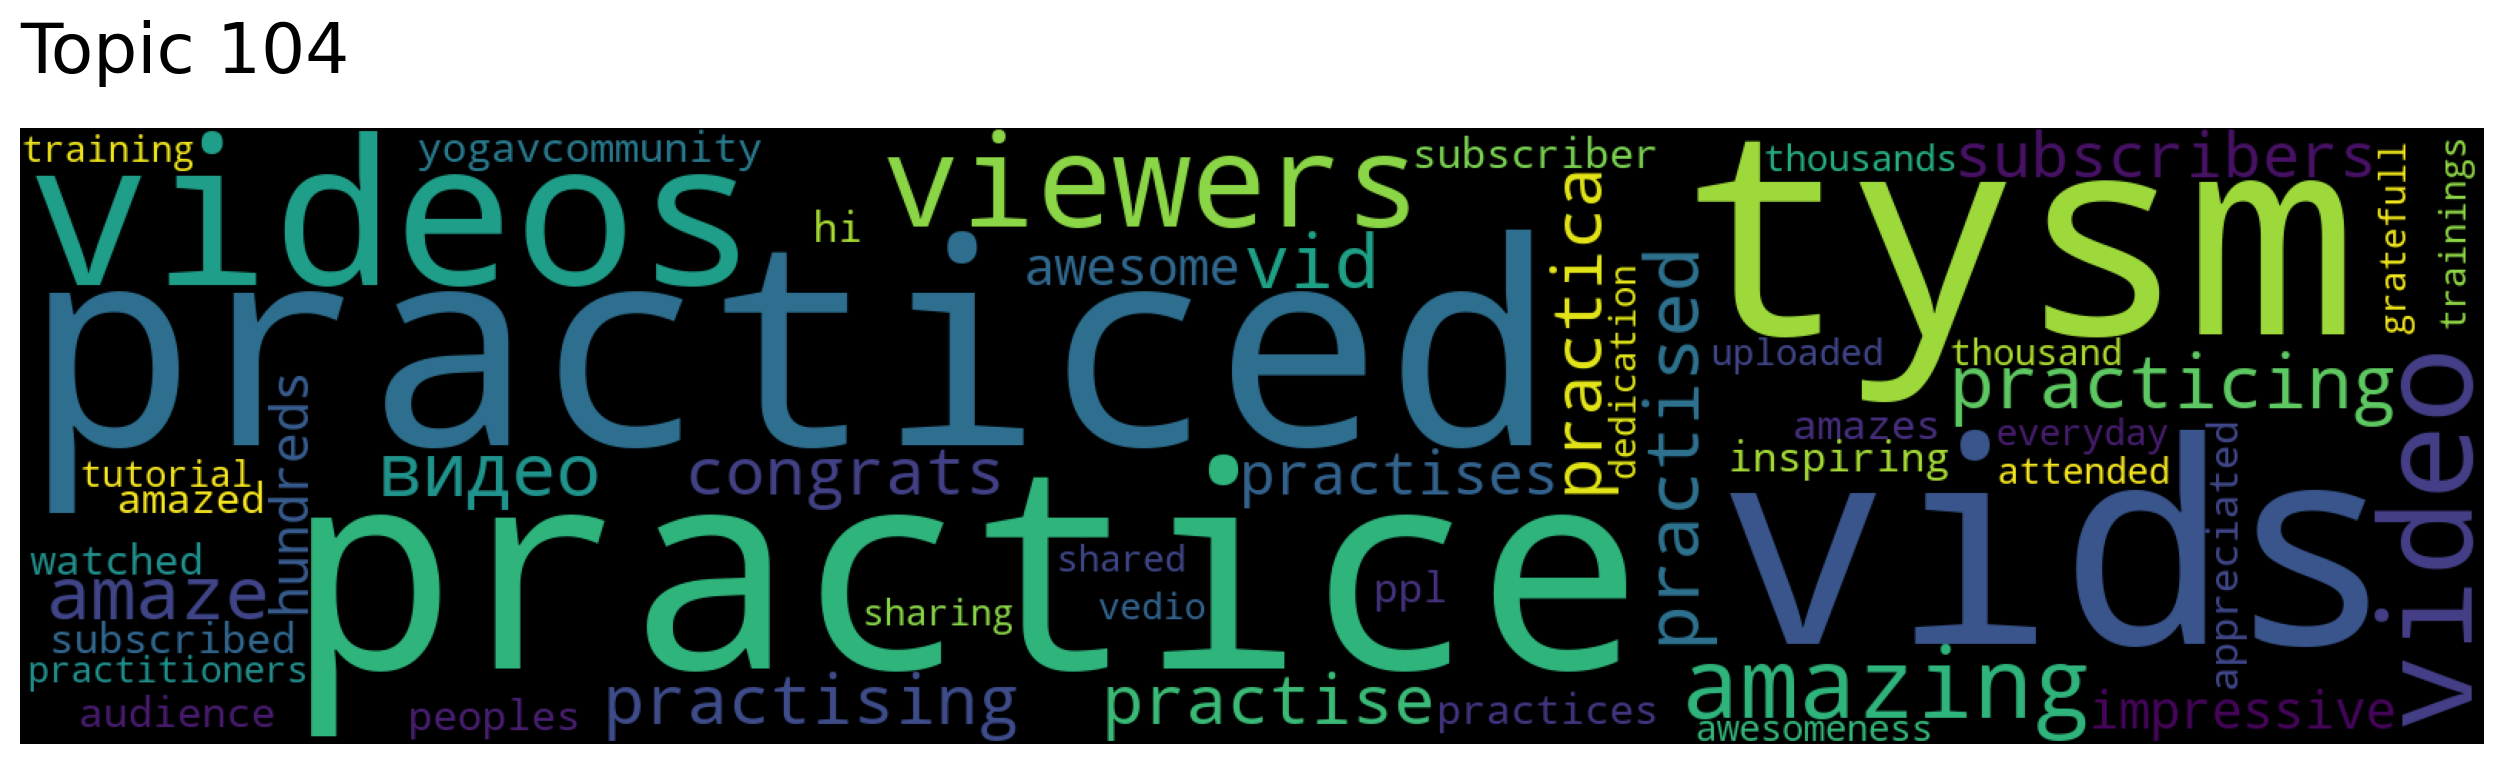

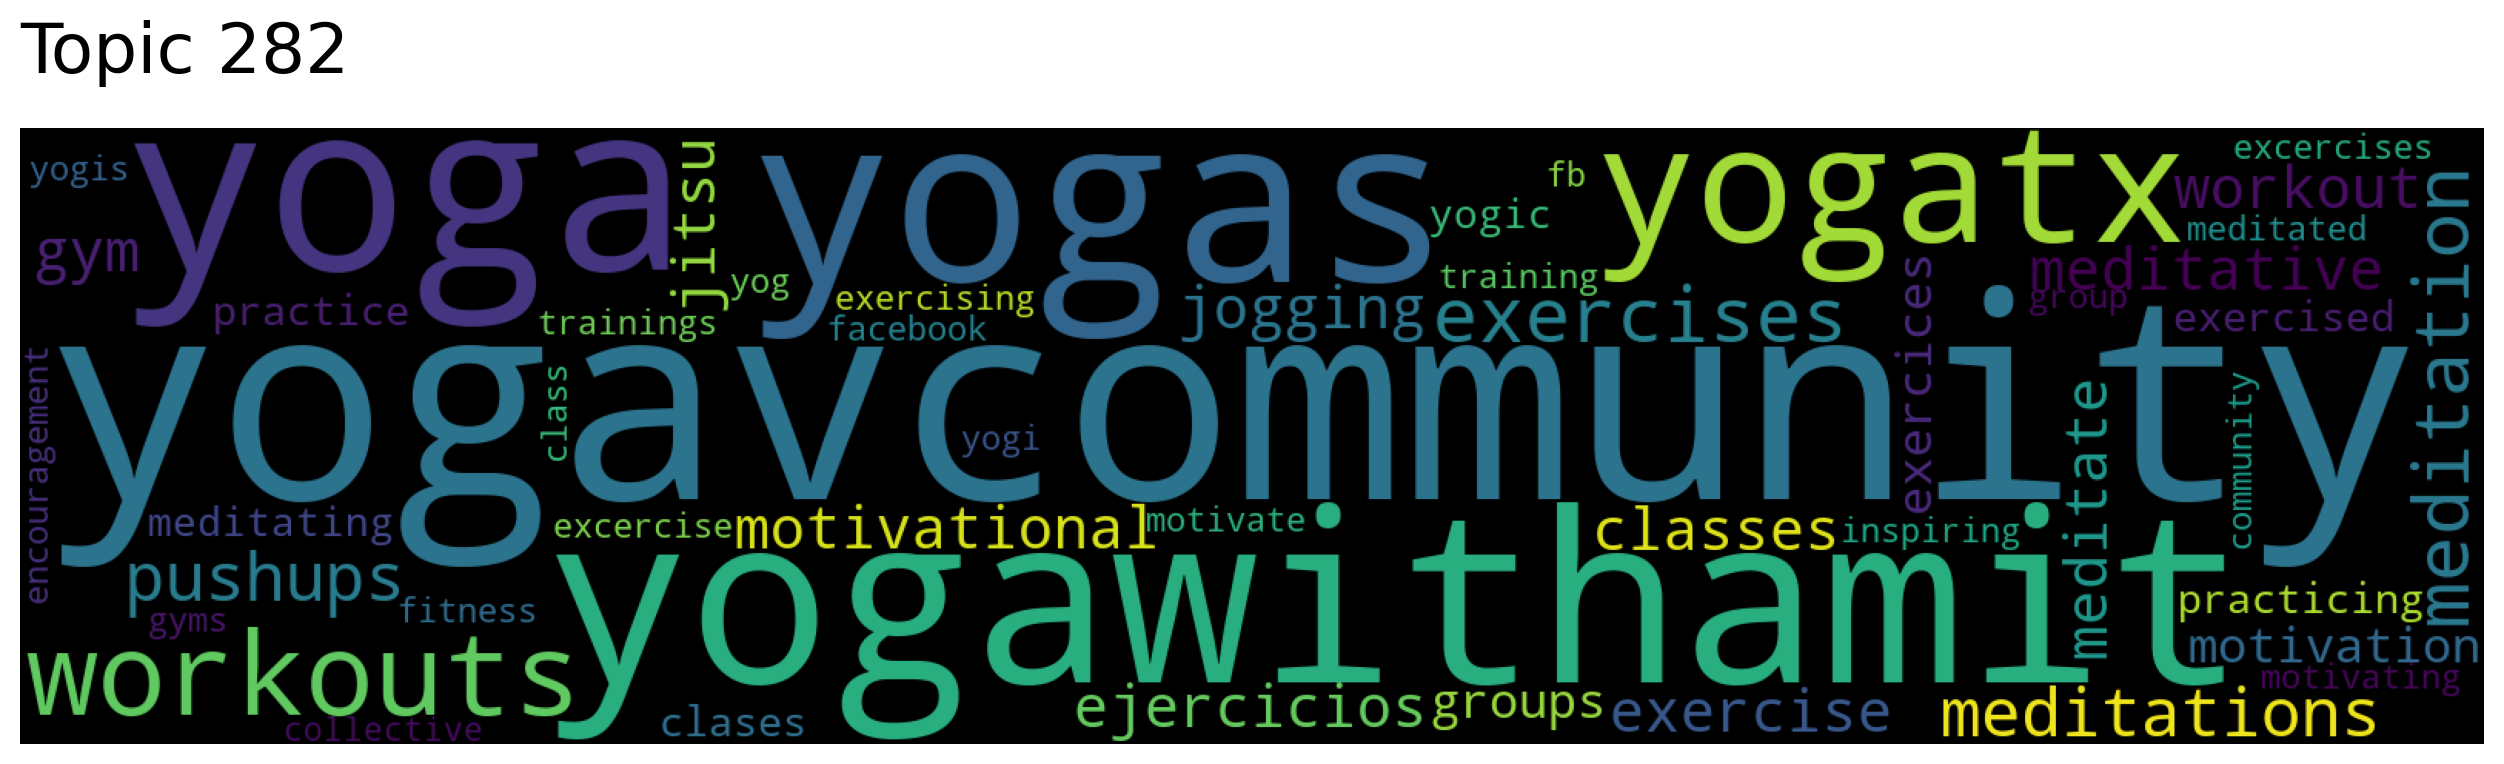

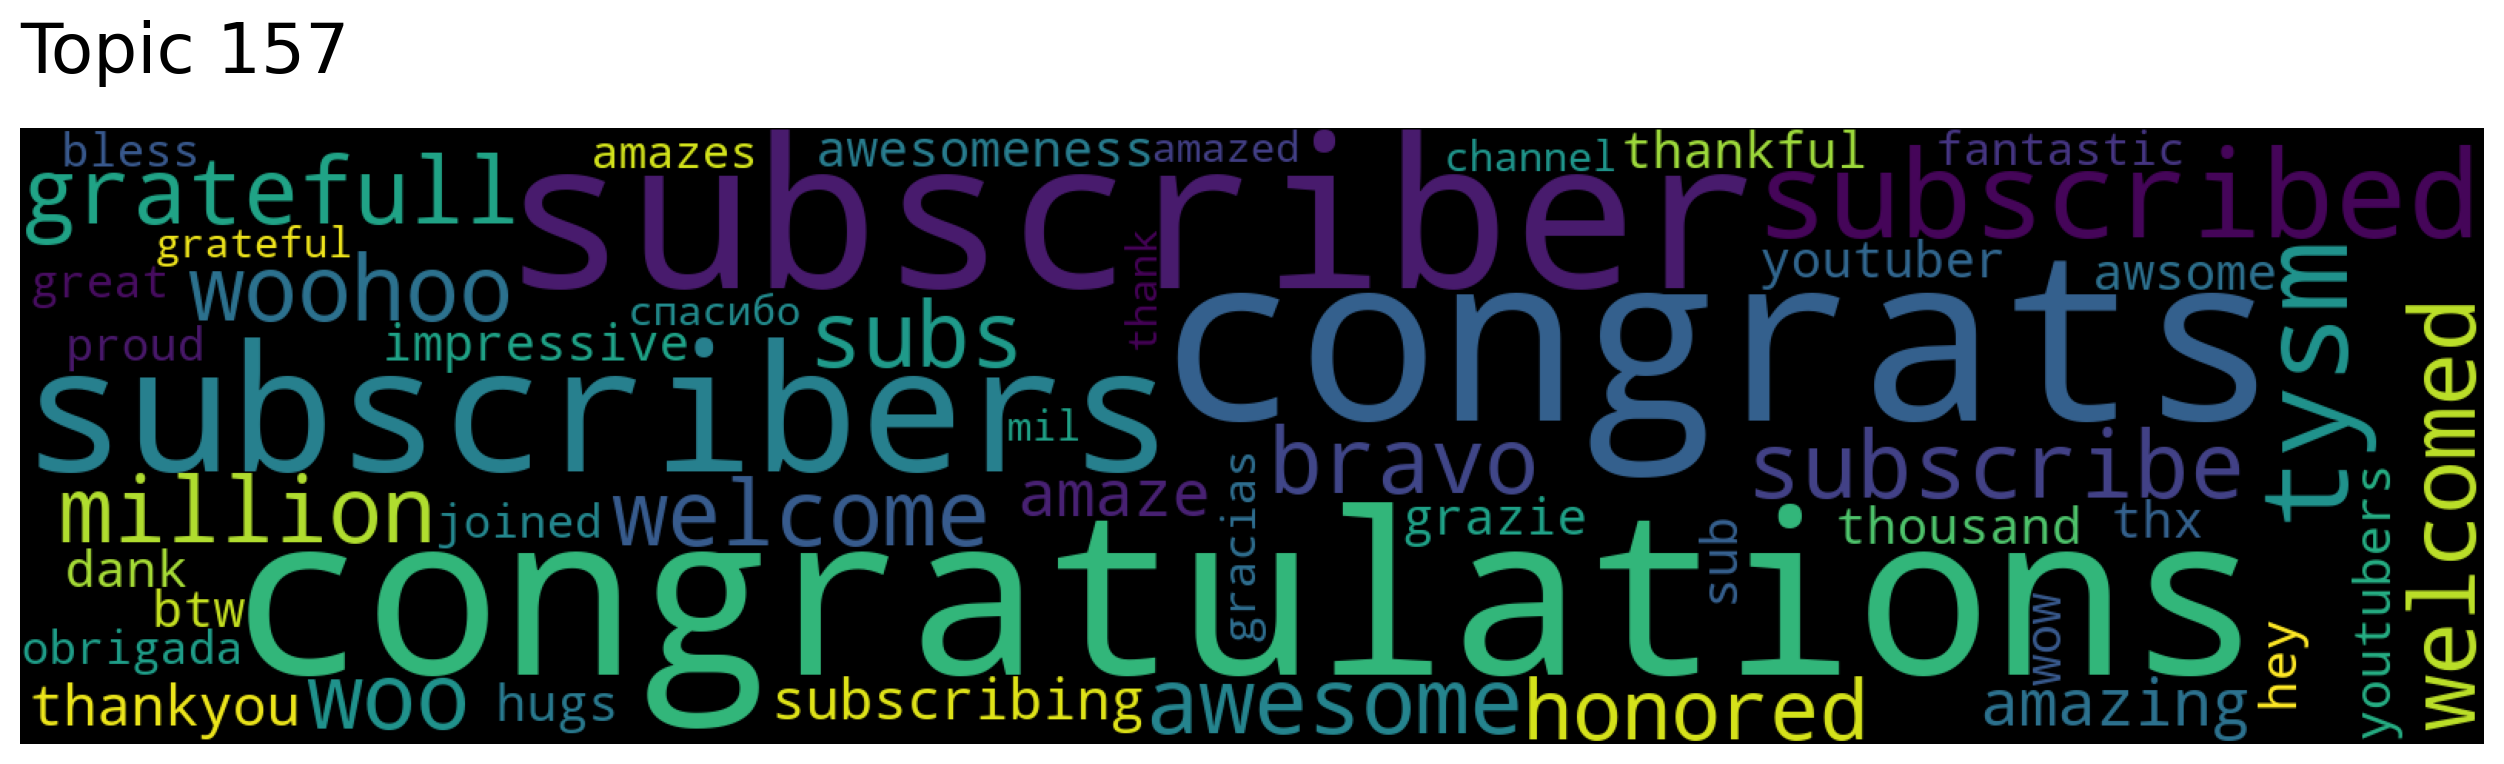

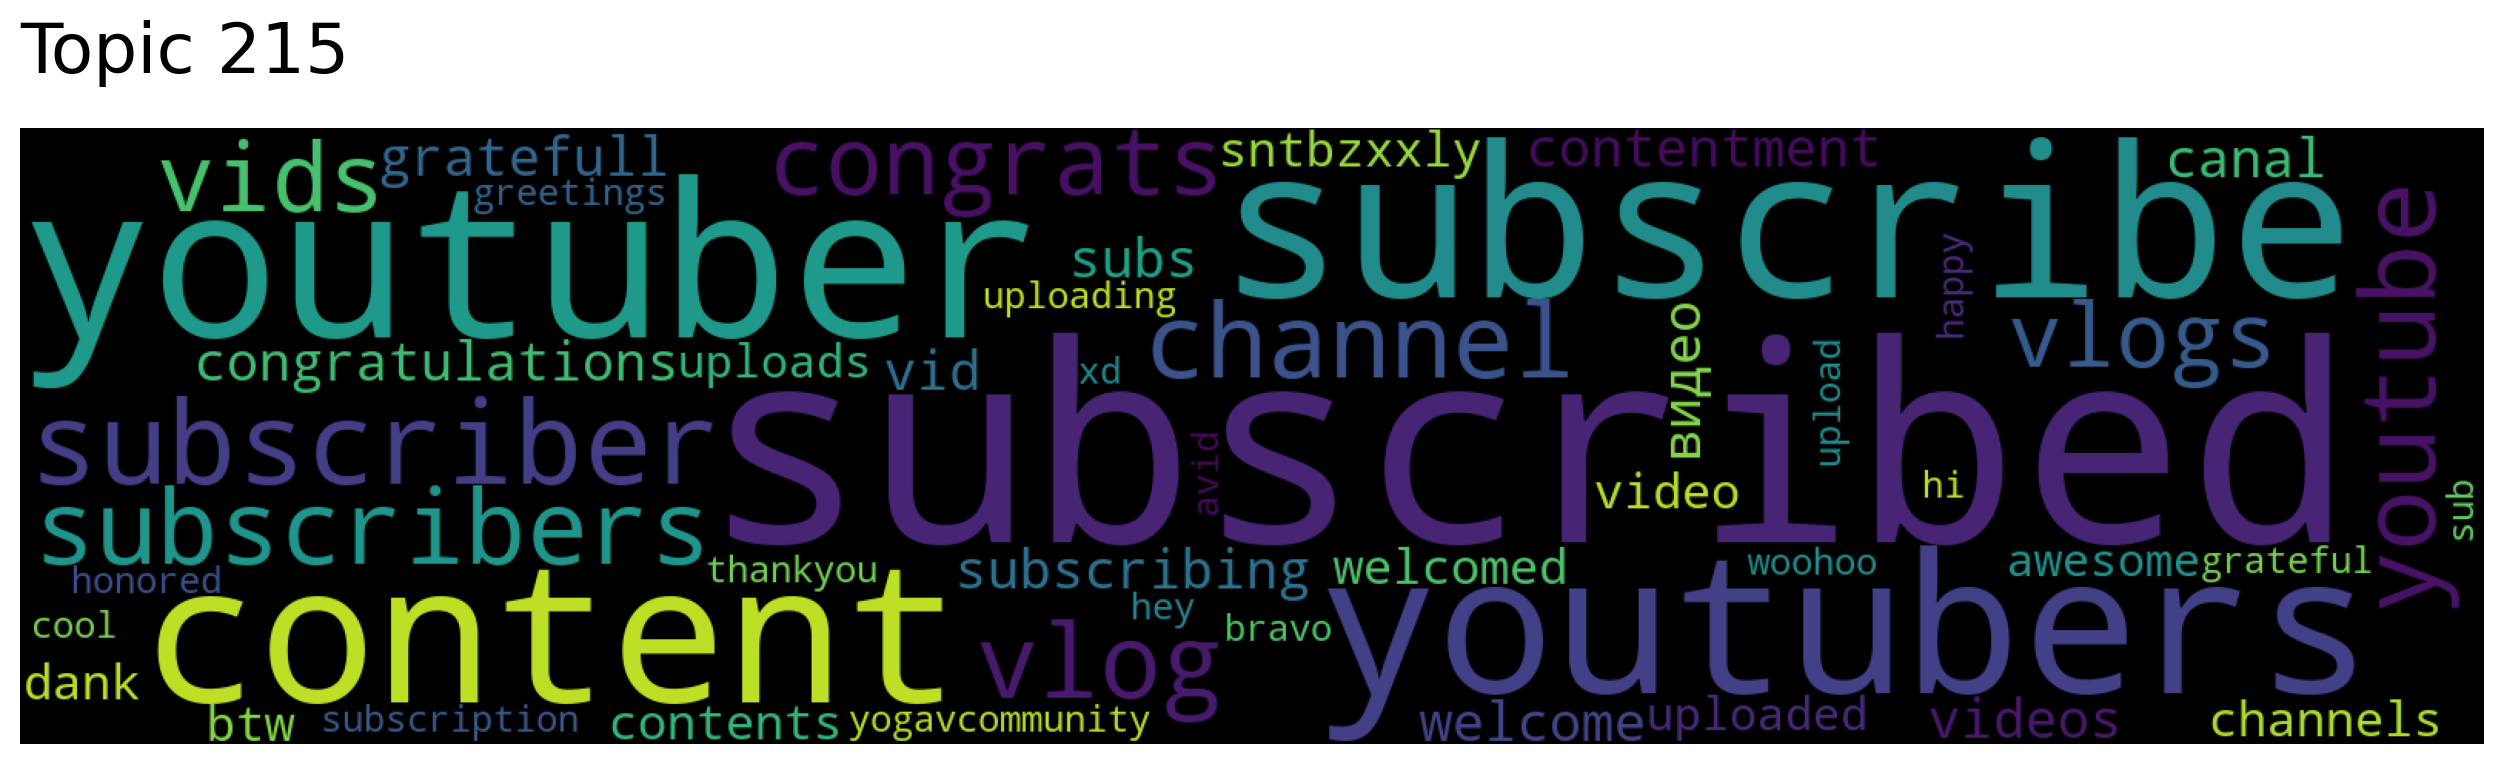

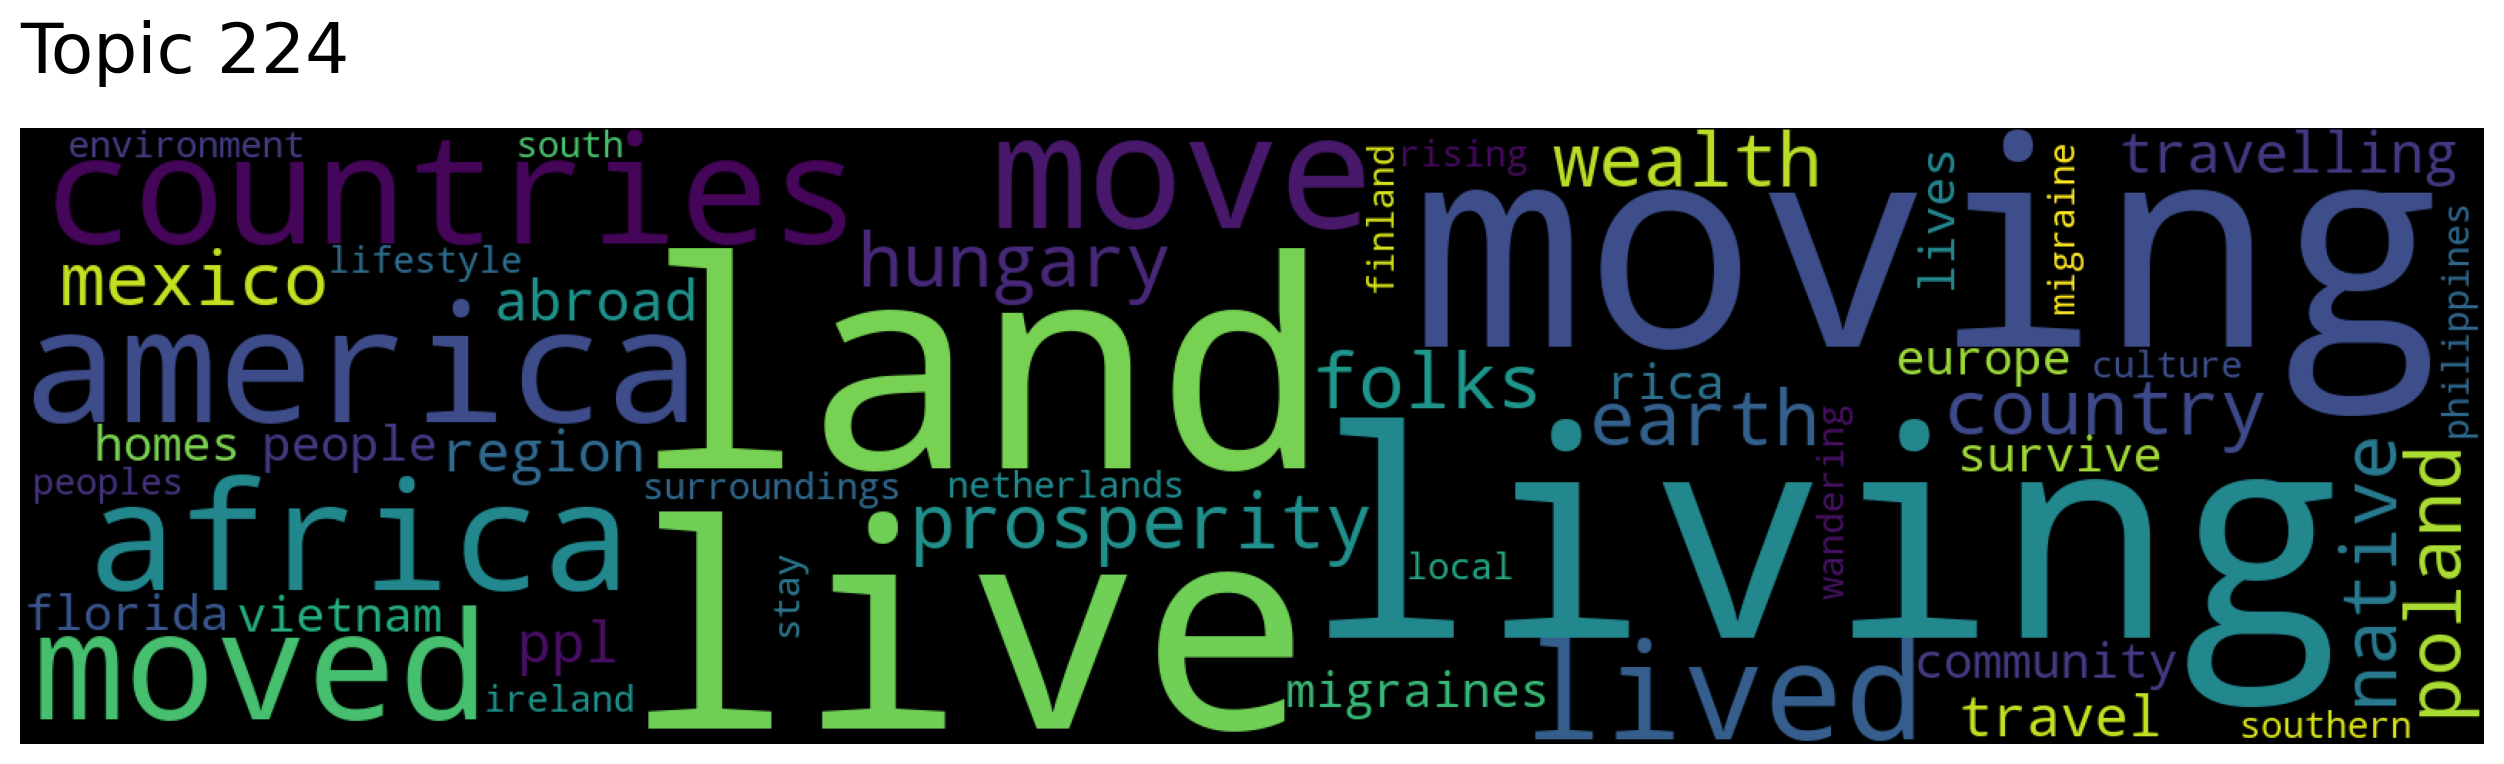

In [11]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["community"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

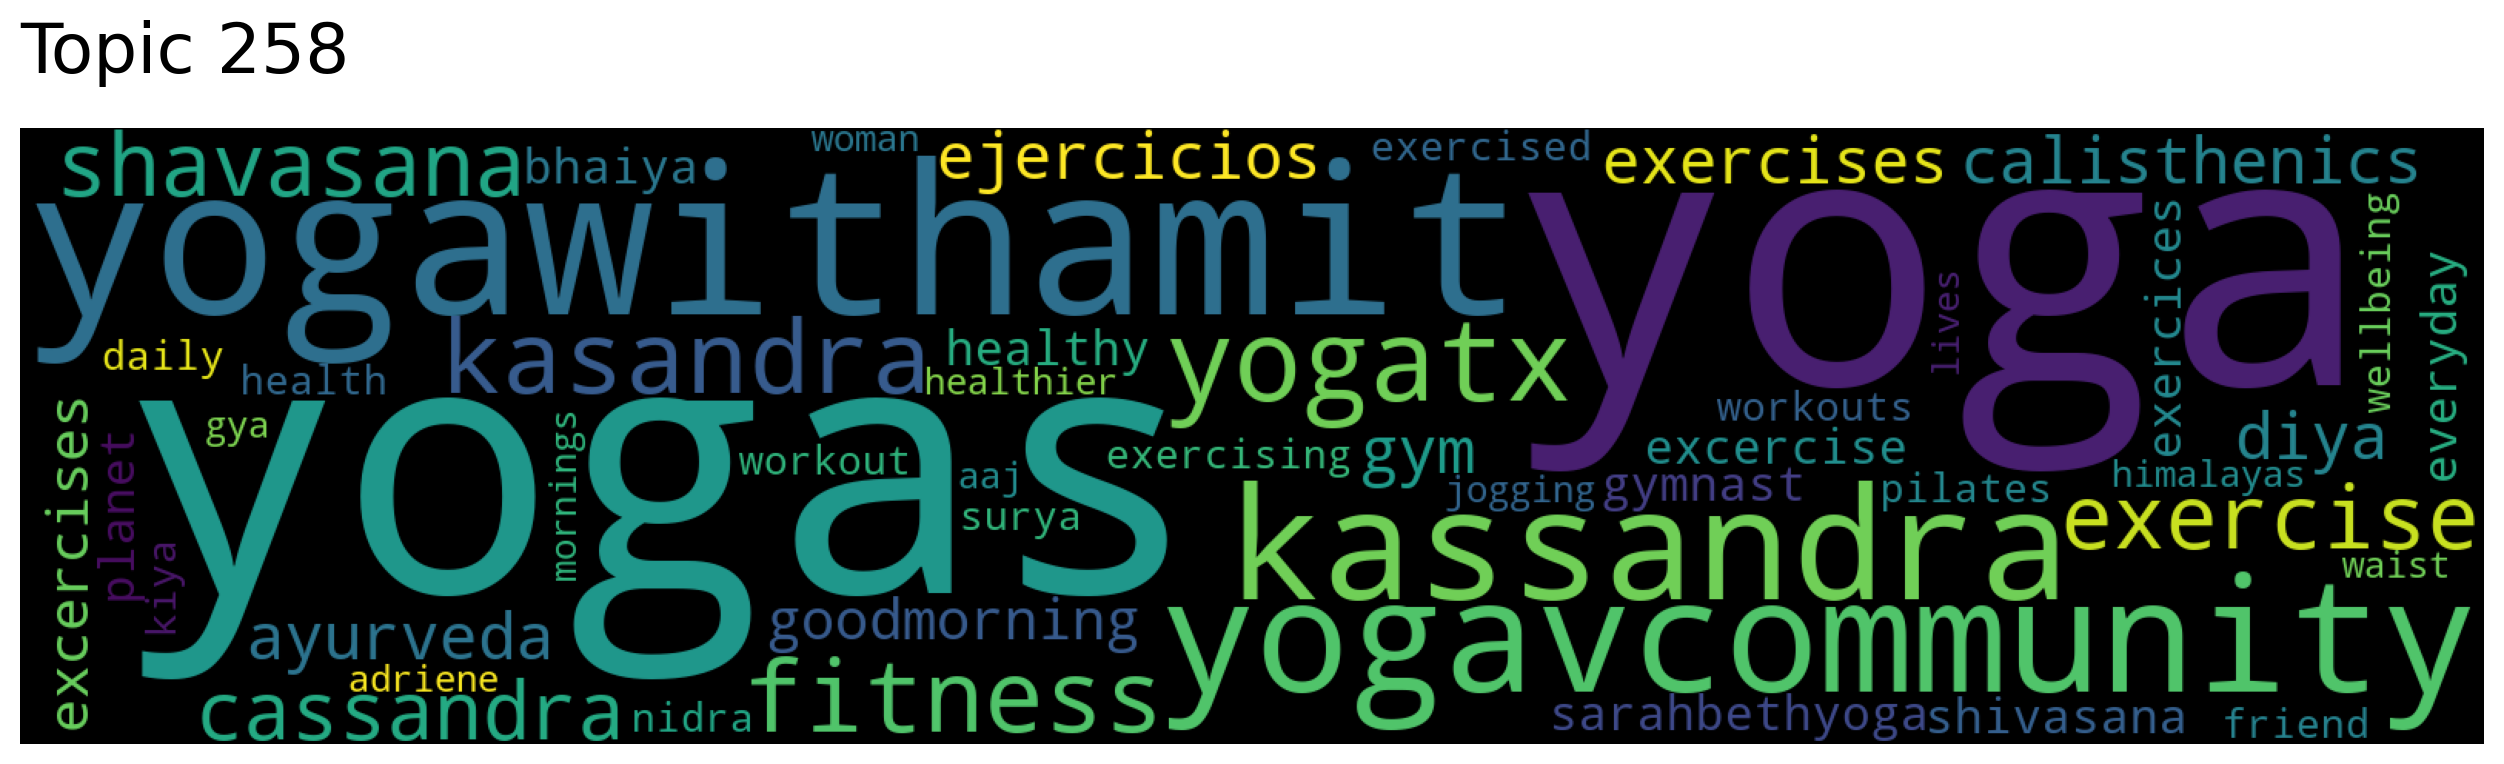

In [14]:
model.generate_topic_wordcloud(258)

## Similar Keywords

In [17]:
words, word_scores = model.similar_words(keywords=["community"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

society 0.7806468515375449
collective 0.6575280977544925
social 0.6557319198316849
association 0.6302808628676726
groups 0.6094992491288718
public 0.609248951106881
shared 0.5861888852377263
group 0.5852370670519251
peoples 0.5764121772091015
people 0.5760646548070996
common 0.5757949295157876
org 0.5693332431759544
folks 0.5689022296468177
participating 0.5651633485816854
ppl 0.5628463189429342
belong 0.5607482119541645
yogavcommunity 0.5518058043808033
sharing 0.5507249132427512
share 0.5480197860639332
welcoming 0.5468886242997064


## Documents

In [48]:
topic_nums, topic_scores, topic_words, word_scores = model.get_documents_topics(list(range(221979)), num_topics=5)

In [49]:
print(topic_nums)
print(topic_scores)

[[ 86 147 202  84 138]
 [  6 132  22  49  15]
 [ 23   8  95   2   7]
 ...
 [ 13   9   0  16  75]
 [ 48  40 170  18  12]
 [ 40  48  21  96  83]]
[[0.729944   0.5331127  0.51731426 0.49290258 0.4904551 ]
 [0.6826509  0.6450166  0.63281786 0.59759074 0.5849807 ]
 [0.77888036 0.7232447  0.70395744 0.67540795 0.6619101 ]
 ...
 [0.6676146  0.6463299  0.63843936 0.6349469  0.63194376]
 [0.68630904 0.6120889  0.6062345  0.59251606 0.5865569 ]
 [0.5758994  0.5594112  0.545123   0.5434947  0.5311158 ]]


In [35]:
# check if there is overlapping topics in the dictionary
for key, value in topic_dict.items():
    for key2, value2 in topic_dict.items():
        if key != key2:
            if len(set(value).intersection(set(value2))) > 0:
                print(f"Overlapping topics between {key} and {key2}: {set(value).intersection(set(value2))}")
                
# inversing the topic_dict dictionary to get the topic name from the topic number
topic_dict_inv = {}
for key, value in topic_dict.items():
    for topic in value:
        topic_dict_inv[topic] = key

print(len(topic_dict_inv))

Overlapping topics between appearance and fitness: {98}
Overlapping topics between fitness and appearance: {98}
24


In [56]:
docs_list = []
for i, doc in enumerate(topic_nums):
    doc_topics = {}
    doc_scores = topic_scores[i]
    for j,topic in enumerate(doc):
        label = topic_dict_inv.get(topic,None)
        if label is not None:
            if label not in doc_topics:
                doc_topics[label] = doc_scores[j]
            else:
                doc_topics[label] += topic_scores[j]

    docs_list.append(doc_topics)

df = pd.DataFrame(docs_list)
df.fillna(0, inplace=True)
df.dtypes
df['label'] = df.idxmax(axis=1)
# df['label_score'] = df.max(axis=1)
# df['label_score'] = df['label_score'].round(2)
# df['label'] = df['label'].astype('category')
# df['label'] = df['label'].cat.set_categories(['interest', 'competence', 'appearance', 'fitness', 'social'])
df['comments'] = docs
df.head()

TypeError: reduction operation 'argmax' not allowed for this dtype

In [29]:
# get documets by keywords
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=48, num_docs=5)

{'interest': array([ 64,  39, 250, 175,  34], dtype=int64), 'competence': array([ 7, 58, 81, 72, 82], dtype=int64), 'appearance': array([ 98, 174, 142, 146, 186], dtype=int64), 'fitness': array([ 98,   1,  28,  38, 268], dtype=int64), 'social': array([204, 258, 224, 241, 181], dtype=int64)}
